# Consumer rating of cereals

![Cereals](img/cereals.jpg "Some cereals")

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/assignments/assignment3/ass3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Instructions
- Complete as needed this notebook in order to be able to answer the various questions.
- Submit on moodle your notebook as well as the PDF or HTML copy of your notebook (with answers computed)
- Please submit a clean notebook (i.e. only the code needed to obtain the answers and not including all debugging / trials you did)

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline

## Data

Source: https://www.kaggle.com/datasets/crawford/80-cereals

```
Fields in the dataset:

    Name: Name of cereal
    mfr: Manufacturer of cereal
        A = American Home Food Products;
        G = General Mills
        K = Kelloggs
        N = Nabisco
        P = Post
        Q = Quaker Oats
        R = Ralston Purina 
    type:
        cold
        hot 
    calories: calories per serving
    protein: grams of protein
    fat: grams of fat
    sodium: milligrams of sodium
    fiber: grams of dietary fiber
    carbo: grams of complex carbohydrates
    sugars: grams of sugars
    potass: milligrams of potassium
    vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
    shelf: display shelf (1, 2, or 3, counting from the floor)
    weight: weight in ounces of one serving
    cups: number of cups in one serving
    rating: a rating of the cereals

```

In [2]:
cereals = pd.read_csv('cereal.csv')
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Questions

## 1. Data preparation

In this question we are going to prepare the data for our model training. For this we will remove some features we will not consider and create two classes that will be the target values of our models.

In [3]:
# Creation of a copy of the original data
df = cereals.copy()

### 1.1. Creation of two classes

The histogram below shows the distribution the consumer ratings 

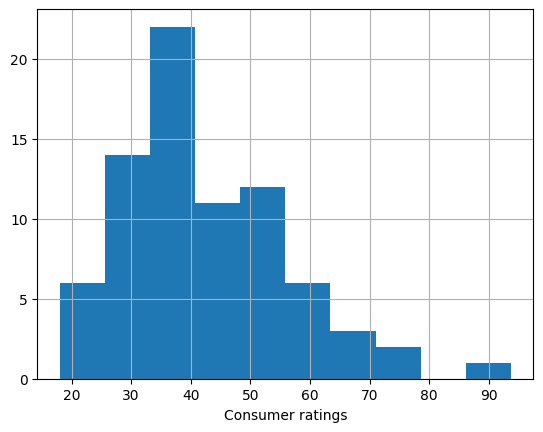

In [4]:
cereals.rating.hist()
plt.xlabel('Consumer ratings')
plt.show()

Create a new column `quality` in your `dataframe` `df` which takes two values: `good` and `poor`.<br>
For consumer ratings higher than 40 the value should be `good`, and for the oter cases it should be `low`. 

In [ ]:
# Creation of your new column
df['quality'] = 


Create a bar plot showing the two classes you created. Are they approximately balanced?

In [ ]:
# Bar plot of the two classes


### 1.2. Splitting your data in training and test sets

In [ ]:
# Target values
y = df.quality

In [ ]:
# Drop columns that are no longer needed at this stage
df = df.drop(columns=['name', 'shelf', 'rating', 'quality'])

In [ ]:
# Split in training and test set
df_train, df_test, y_train, y_test = train_test_split(df, y,  test_size=0.2, random_state=0)

## 2. Numerical features importance estimation using a random forest

In this part we will find which numerical features have the most importance in the predcition of the quality of the product.

In [ ]:
# List of numerical features we have
numeric_features = ['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']

To estimate the importance of these numerical features we train a random forest classifier using these features and then list the features according order of importance.

Methodology to follow:
- Using cross-validation, fine tune the hyper-parameter `n_estimators`
- Train the random forest using the tuned hyper-parameter `n_estimators`
- List in order of importance the features using the `feature_importances_` attribute of the trained random forest.

### 2.1. Random forest hyper-parameter tuning by cross validation

In [ ]:
# Features matrix
X_train = np.c_[df_train.protein, df_train.fat, df_train.sodium, df_train.fiber, df_train.carbo, df_train.sugars, df_train.potass, df_train.vitamins]

In [ ]:
# Cross validation


### 2.2. Train random forest

In [ ]:
# Train a random forest classifier with the selected hyper-parameter `n_estimators


### 2.3. Display features by importance

In [ ]:
# List of features by decreasing order of importance


### 3. Pre-processing pipeline

In this question we will create the pipeline to pre-process the data for all coming models.

The pipeline handles the numerical features and the categorical features differently:
- For all numerical features we apply a `StandardScaler`.
- For all categorical features we apply a `OneHotEncoder`.

The numerical features to use are the three most important features you have identified in question 2.3.

The categorical features are `mfr` and `type`.

In [ ]:
# Pipeline to transform the features (StandardScaler for numerical and OneHotEncoder for categorical features)
# Use the template below
#
# Note: The picture below shows and example where the numerical features would be 'fiber', 'potass' and 'sugars'

def preProcess():
    """
    Pre-processing pipeline for the data
    """
    pass

![Pipeline](img/preprocess_pipeline.png "Visual representation of the pipeline")

## 4. Random forest

In this question we train a random forest classifier on our data.

Methodology to follow:
- Using cross-validation, fine tune the hyper-parameter `n_estimators`
- Train the random forest using the tuned hyper-parameter `n_estimators`
- Evaluate its performance (Score and confusion matrix) on the test set

### 4.1. Cross validation

In [ ]:
# Pre-process the training data with your pipeline
pip = preProcess()
X_train = pip.fit_transform(df_train, y_train)

In [ ]:
# Fine tune n_estimators by cross validation


### 4.2. Training of a random forest

In [ ]:
# Train a radnom forest classifier with the selected hyper-parameter n_estimators


### 4.3. Evaluation on test set

In [ ]:
# Pre-process the test data with your pipeline
X_test = pip.transform(df_test)

In [ ]:
# Compute the accuracy of your trained model


In [ ]:
# Display the confusion matrix


## 5. KNN

In this question we train a KNN classifier (`KNeighborsClassifier`) on our data.

Methodology to follow:
- Using cross-validation, fine tune the hyper-parameter `n_neighbors`
- Train the KNN model using the tuned hyper-parameter `n_neighbors`
- Evaluate its performance (Score and confusion matrix) on the test set

### 5.1. Cross validation

In [ ]:
# Pre-process the training data with your pipeline
pip = preProcess()
X_train = pip.fit_transform(df_train, y_train)

In [ ]:
# Fine tune n_neighbors by cross validation


### 5.2. Training of a KNN classifier

In [ ]:
# Train a KNN classifier with the selected hyper-parameter n_neighbors


### 5.3. Evaluation on test set

In [ ]:
# Pre-process the test data with your pipeline
X_test = pip.transform(df_test)

In [ ]:
# Compute the accuracy of your trained model


In [ ]:
# Display the confusion matrix


## 6. Logistic regression

In this question we train a Logistic Regression classifier (`LogisticRegression`) on our data.

### 6.1. Logistic regression model training

In [ ]:
# Pre-process the training data with your pipeline
pip = preProcess()
X_train = pip.fit_transform(df_train, y_train)

In [ ]:
# Train a Logistic Regression classifier


### 6.2. Evaluation on test set

In [ ]:
# Pre-process the test data with your pipeline
X_test = pip.transform(df_test)

In [ ]:
# Compute the accuracy of your trained model


In [ ]:
# Display the confusion matrix
